# Gradient Boosting

### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from tqdm import tqdm
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectPercentile, f_classif

### Model 1
#### Read CSV

In [2]:
train_m1 = pd.read_csv('../../../../Data_AA2/train_m1.csv', sep = ',')
train_m1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0.37521,-0.756929,-1.925779,0.580938,-0.515445,0.939376,-0.453565,-0.763196,1.192581,0.001762,...,-0.561357,0.196894,-0.348973,0.188003,-0.118566,-0.651221,-0.324357,0.259352,0.395979,0
1,0.37521,1.471189,-0.283258,-0.824024,-0.515445,0.939376,-0.453565,1.310279,-0.098471,-0.713715,...,0.148956,0.196894,-0.348973,0.188003,0.837519,1.529013,-0.281151,0.769787,0.843536,0
2,0.37521,0.078615,-0.283258,1.049258,-0.515445,0.939376,-0.453565,-0.763196,-1.389523,1.432715,...,-0.561357,0.196894,-0.348973,0.188003,0.837519,-0.230686,0.950220,0.773829,0.843536,0
3,0.37521,-0.756929,-0.283258,-0.824024,-0.515445,-1.090085,-0.453565,1.310279,1.192581,1.432715,...,-0.206200,0.196894,-0.348973,0.188003,-0.118566,-0.651221,-0.324357,0.284758,0.395979,0
4,0.37521,-1.035444,-1.925779,1.049258,1.938451,0.939376,-0.453565,1.310279,0.762230,-0.713715,...,0.859269,0.196894,-0.348973,0.188003,0.646302,0.717242,0.885411,0.710313,0.329470,0


In [3]:
test_m1 = pd.read_csv('../../../../Data_AA2/test_m1.csv', sep = ',')
test_m1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0.37521,1.471189,-0.283258,0.580938,-0.515445,0.939376,-0.453565,1.310279,0.762230,0.717238,...,-0.561357,0.196894,-0.348973,0.188003,0.646302,0.717242,0.885411,0.710313,0.329470,0
1,0.37521,0.914159,-1.925779,-0.355703,-0.515445,-1.090085,-0.453565,1.310279,0.762230,1.432715,...,-0.561357,0.196894,-0.348973,0.188003,0.646302,0.717242,0.885411,0.709736,0.329470,0
2,0.37521,1.471189,-0.283258,0.580938,1.938451,0.939376,-0.453565,1.310279,0.762230,-1.429191,...,-0.561357,0.196894,-0.348973,0.188003,0.646302,0.717242,0.885411,0.711468,0.329470,0
3,0.37521,-0.756929,1.359263,-1.760665,-0.515445,-1.090085,-0.453565,-0.763196,0.762230,1.432715,...,-0.561357,0.196894,1.662067,-2.562036,-1.202130,-1.180338,-1.231682,-1.354522,-0.943918,0
4,0.37521,-1.035444,-0.283258,1.049258,1.938451,0.939376,-0.453565,-0.763196,-1.389523,0.717238,...,0.148956,0.196894,-0.348973,0.188003,0.837519,-0.230686,0.950220,0.771519,0.843536,0


In [4]:
#get target
train_m1_target = train_m1['y']
train_m1 = train_m1.drop(columns=['y'])

In [5]:
#get target
test_m1_target = test_m1['y']
test_m1 = test_m1.drop(columns=['y'])

### Check for lower errors

In [6]:
error_rate = []

for i in tqdm(range(1,60)):
    clf = GradientBoostingClassifier(max_depth=i, random_state=0)
    clf.fit(train_m1,train_m1_target)
    predictions = clf.predict(test_m1)
    error_rate.append(np.mean(predictions != test_m1_target))

100%|██████████████████████████████████████████████████████████████████████████████████| 59/59 [34:16<00:00, 34.86s/it]


Text(0, 0.5, 'Error Rate')

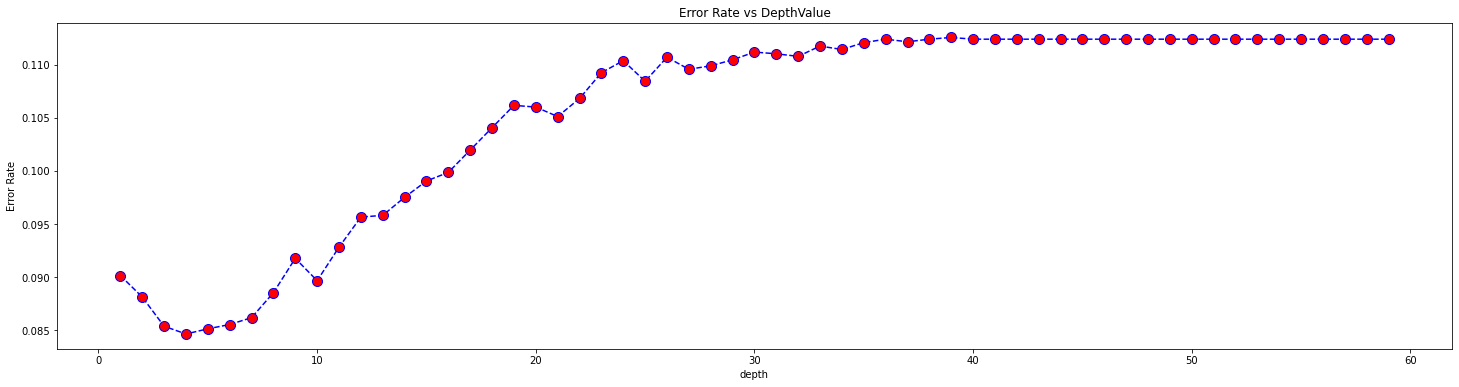

In [8]:
plt.figure(figsize=(25,6))
plt.plot(range(1,60),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs DepthValue')
plt.xlabel("depth")
plt.ylabel("Error Rate")

#### Hyperparameter tuning using GridSearchCV

In [9]:
%%time
# Create the parameter grid based on the results of random search 
parameters = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":range(2,8),
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10]
    }

# Create the model
gb_model = GradientBoostingClassifier()

# Best model
opt_model_gb = GridSearchCV(gb_model, parameters,  scoring='accuracy', verbose=10)

# Fit the model
opt_model_gb.fit(train_m1, train_m1_target)

print (opt_model_gb.best_estimator_)

Fitting 5 folds for each of 169344 candidates, totalling 846720 fits
[CV 1/5; 1/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=10, subsample=0.5
[CV 1/5; 1/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 2/5; 1/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=10, subsample=0.5
[CV 2/5; 1/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 3/5; 1/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples

[CV 1/5; 5/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=10, subsample=0.9; total time=   0.0s
[CV 2/5; 5/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=10, subsample=0.9
[CV 2/5; 5/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=10, subsample=0.9; total time=   0.0s
[CV 3/5; 5/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=10, subsample=0.9
[CV 3/5; 5/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=10, subsample=0.9; total

[CV 2/5; 9/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.13636363636363638, n_estimators=10, subsample=0.618; total time=   0.0s
[CV 3/5; 9/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.13636363636363638, n_estimators=10, subsample=0.618
[CV 3/5; 9/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.13636363636363638, n_estimators=10, subsample=0.618; total time=   0.0s
[CV 4/5; 9/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.13636363636363638, n_estimators=10, subsample=0.618
[CV 4/5; 9/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_sample

[CV 2/5; 13/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.13636363636363638, n_estimators=10, subsample=0.95; total time=   0.0s
[CV 3/5; 13/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.13636363636363638, n_estimators=10, subsample=0.95
[CV 3/5; 13/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.13636363636363638, n_estimators=10, subsample=0.95; total time=   0.0s
[CV 4/5; 13/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.13636363636363638, n_estimators=10, subsample=0.95
[CV 4/5; 13/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_sampl

[CV 3/5; 17/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.17272727272727273, n_estimators=10, subsample=0.8; total time=   0.0s
[CV 4/5; 17/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.17272727272727273, n_estimators=10, subsample=0.8
[CV 4/5; 17/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.17272727272727273, n_estimators=10, subsample=0.8; total time=   0.0s
[CV 5/5; 17/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.17272727272727273, n_estimators=10, subsample=0.8
[CV 5/5; 17/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_l

[CV 3/5; 21/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.17272727272727273, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 4/5; 21/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.17272727272727273, n_estimators=10, subsample=1.0
[CV 4/5; 21/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.17272727272727273, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 5/5; 21/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.17272727272727273, n_estimators=10, subsample=1.0
[CV 5/5; 21/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_l

[CV 4/5; 25/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.2090909090909091, n_estimators=10, subsample=0.85; total time=   0.0s
[CV 5/5; 25/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.2090909090909091, n_estimators=10, subsample=0.85
[CV 5/5; 25/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.2090909090909091, n_estimators=10, subsample=0.85; total time=   0.0s
[CV 1/5; 26/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.2090909090909091, n_estimators=10, subsample=0.9
[CV 1/5; 26/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_le

[CV 5/5; 29/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.24545454545454548, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 1/5; 30/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.24545454545454548, n_estimators=10, subsample=0.618
[CV 1/5; 30/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.24545454545454548, n_estimators=10, subsample=0.618; total time=   0.0s
[CV 2/5; 30/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.24545454545454548, n_estimators=10, subsample=0.618
[CV 2/5; 30/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_sam

[CV 1/5; 34/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.24545454545454548, n_estimators=10, subsample=0.95; total time=   0.0s
[CV 2/5; 34/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.24545454545454548, n_estimators=10, subsample=0.95
[CV 2/5; 34/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.24545454545454548, n_estimators=10, subsample=0.95; total time=   0.0s
[CV 3/5; 34/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.24545454545454548, n_estimators=10, subsample=0.95
[CV 3/5; 34/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_sampl

[CV 5/5; 37/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.28181818181818186, n_estimators=10, subsample=0.618; total time=   0.0s
[CV 1/5; 38/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.28181818181818186, n_estimators=10, subsample=0.8
[CV 1/5; 38/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.28181818181818186, n_estimators=10, subsample=0.8; total time=   0.0s
[CV 2/5; 38/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.28181818181818186, n_estimators=10, subsample=0.8
[CV 2/5; 38/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples

[CV 5/5; 41/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.28181818181818186, n_estimators=10, subsample=0.95; total time=   0.0s
[CV 1/5; 42/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.28181818181818186, n_estimators=10, subsample=1.0
[CV 1/5; 42/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.28181818181818186, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 2/5; 42/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.28181818181818186, n_estimators=10, subsample=1.0
[CV 2/5; 42/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_

[CV 5/5; 45/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.31818181818181823, n_estimators=10, subsample=0.8; total time=   0.0s
[CV 1/5; 46/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.31818181818181823, n_estimators=10, subsample=0.85
[CV 1/5; 46/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.31818181818181823, n_estimators=10, subsample=0.85; total time=   0.0s
[CV 2/5; 46/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.31818181818181823, n_estimators=10, subsample=0.85
[CV 2/5; 46/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_sample

[CV 1/5; 50/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.3545454545454546, n_estimators=10, subsample=0.5
[CV 1/5; 50/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.3545454545454546, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 2/5; 50/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.3545454545454546, n_estimators=10, subsample=0.5
[CV 2/5; 50/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.3545454545454546, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 3/5; 50/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_lea

[CV 5/5; 53/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.3545454545454546, n_estimators=10, subsample=0.85; total time=   0.0s
[CV 1/5; 54/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.3545454545454546, n_estimators=10, subsample=0.9
[CV 1/5; 54/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.3545454545454546, n_estimators=10, subsample=0.9; total time=   0.0s
[CV 2/5; 54/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.3545454545454546, n_estimators=10, subsample=0.9
[CV 2/5; 54/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf

[CV 1/5; 58/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.390909090909091, n_estimators=10, subsample=0.618; total time=   0.0s
[CV 2/5; 58/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.390909090909091, n_estimators=10, subsample=0.618
[CV 2/5; 58/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.390909090909091, n_estimators=10, subsample=0.618; total time=   0.0s
[CV 3/5; 58/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.390909090909091, n_estimators=10, subsample=0.618
[CV 3/5; 58/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_l

[CV 2/5; 62/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.390909090909091, n_estimators=10, subsample=0.95; total time=   0.0s
[CV 3/5; 62/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.390909090909091, n_estimators=10, subsample=0.95
[CV 3/5; 62/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.390909090909091, n_estimators=10, subsample=0.95; total time=   0.0s
[CV 4/5; 62/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.390909090909091, n_estimators=10, subsample=0.95
[CV 4/5; 62/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=

[CV 3/5; 66/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.42727272727272736, n_estimators=10, subsample=0.8; total time=   0.0s
[CV 4/5; 66/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.42727272727272736, n_estimators=10, subsample=0.8
[CV 4/5; 66/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.42727272727272736, n_estimators=10, subsample=0.8; total time=   0.0s
[CV 5/5; 66/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.42727272727272736, n_estimators=10, subsample=0.8
[CV 5/5; 66/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_l

[CV 4/5; 70/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.42727272727272736, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 5/5; 70/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.42727272727272736, n_estimators=10, subsample=1.0
[CV 5/5; 70/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.42727272727272736, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 1/5; 71/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.46363636363636374, n_estimators=10, subsample=0.5
[CV 1/5; 71/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_l

[CV 3/5; 74/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.46363636363636374, n_estimators=10, subsample=0.85; total time=   0.0s
[CV 4/5; 74/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.46363636363636374, n_estimators=10, subsample=0.85
[CV 4/5; 74/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.46363636363636374, n_estimators=10, subsample=0.85; total time=   0.0s
[CV 5/5; 74/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.46363636363636374, n_estimators=10, subsample=0.85
[CV 5/5; 74/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_sampl

[CV 4/5; 78/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 5/5; 78/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=10, subsample=0.5
[CV 5/5; 78/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 1/5; 79/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=10, subsample=0.618
[CV 1/5; 79/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=10, subsample=0.6

[CV 1/5; 83/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=10, subsample=0.95; total time=   0.0s
[CV 2/5; 83/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=10, subsample=0.95
[CV 2/5; 83/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=10, subsample=0.95; total time=   0.0s
[CV 3/5; 83/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=10, subsample=0.95
[CV 3/5; 83/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=10, subsample=0

[CV 3/5; 87/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.13636363636363638, min_samples_split=0.1, n_estimators=10, subsample=0.8; total time=   0.0s
[CV 4/5; 87/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.13636363636363638, min_samples_split=0.1, n_estimators=10, subsample=0.8
[CV 4/5; 87/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.13636363636363638, min_samples_split=0.1, n_estimators=10, subsample=0.8; total time=   0.0s
[CV 5/5; 87/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.13636363636363638, min_samples_split=0.1, n_estimators=10, subsample=0.8
[CV 5/5; 87/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_l

[CV 4/5; 91/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.13636363636363638, min_samples_split=0.1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 5/5; 91/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.13636363636363638, min_samples_split=0.1, n_estimators=10, subsample=1.0
[CV 5/5; 91/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.13636363636363638, min_samples_split=0.1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 1/5; 92/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.13636363636363638, min_samples_split=0.13636363636363638, n_estimators=10, subsample=0.5
[CV 1/5; 92/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log

[CV 4/5; 95/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.13636363636363638, min_samples_split=0.13636363636363638, n_estimators=10, subsample=0.85; total time=   0.0s
[CV 5/5; 95/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.13636363636363638, min_samples_split=0.13636363636363638, n_estimators=10, subsample=0.85
[CV 5/5; 95/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.13636363636363638, min_samples_split=0.13636363636363638, n_estimators=10, subsample=0.85; total time=   0.0s
[CV 1/5; 96/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.13636363636363638, min_samples_split=0.13636363636363638, n_estimators=10, subsample=0.9
[CV 1/5; 96/169344] END criterion=friedman_mse, learning_rate

[CV 3/5; 99/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.13636363636363638, min_samples_split=0.17272727272727273, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 4/5; 99/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.13636363636363638, min_samples_split=0.17272727272727273, n_estimators=10, subsample=0.5
[CV 4/5; 99/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.13636363636363638, min_samples_split=0.17272727272727273, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 5/5; 99/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.13636363636363638, min_samples_split=0.17272727272727273, n_estimators=10, subsample=0.5
[CV 5/5; 99/169344] END criterion=friedman_mse, learning_rate=0.

[CV 2/5; 103/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.13636363636363638, min_samples_split=0.17272727272727273, n_estimators=10, subsample=0.9; total time=   0.0s
[CV 3/5; 103/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.13636363636363638, min_samples_split=0.17272727272727273, n_estimators=10, subsample=0.9
[CV 3/5; 103/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.13636363636363638, min_samples_split=0.17272727272727273, n_estimators=10, subsample=0.9; total time=   0.0s
[CV 4/5; 103/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.13636363636363638, min_samples_split=0.17272727272727273, n_estimators=10, subsample=0.9
[CV 4/5; 103/169344] END criterion=friedman_mse, learning_ra

[CV 2/5; 107/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.13636363636363638, min_samples_split=0.2090909090909091, n_estimators=10, subsample=0.618; total time=   0.0s
[CV 3/5; 107/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.13636363636363638, min_samples_split=0.2090909090909091, n_estimators=10, subsample=0.618
[CV 3/5; 107/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.13636363636363638, min_samples_split=0.2090909090909091, n_estimators=10, subsample=0.618; total time=   0.0s
[CV 4/5; 107/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.13636363636363638, min_samples_split=0.2090909090909091, n_estimators=10, subsample=0.618
[CV 4/5; 107/169344] END criterion=friedman_mse, learnin

[CV 5/5; 110/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.13636363636363638, min_samples_split=0.2090909090909091, n_estimators=10, subsample=0.9; total time=   0.0s
[CV 1/5; 111/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.13636363636363638, min_samples_split=0.2090909090909091, n_estimators=10, subsample=0.95
[CV 1/5; 111/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.13636363636363638, min_samples_split=0.2090909090909091, n_estimators=10, subsample=0.95; total time=   0.0s
[CV 2/5; 111/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.13636363636363638, min_samples_split=0.2090909090909091, n_estimators=10, subsample=0.95
[CV 2/5; 111/169344] END criterion=friedman_mse, learning_rat

[CV 5/5; 114/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.13636363636363638, min_samples_split=0.24545454545454548, n_estimators=10, subsample=0.618; total time=   0.0s
[CV 1/5; 115/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.13636363636363638, min_samples_split=0.24545454545454548, n_estimators=10, subsample=0.8
[CV 1/5; 115/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.13636363636363638, min_samples_split=0.24545454545454548, n_estimators=10, subsample=0.8; total time=   0.0s
[CV 2/5; 115/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.13636363636363638, min_samples_split=0.24545454545454548, n_estimators=10, subsample=0.8
[CV 2/5; 115/169344] END criterion=friedman_mse, learning_

[CV 3/5; 118/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.13636363636363638, min_samples_split=0.24545454545454548, n_estimators=10, subsample=0.95; total time=   0.0s
[CV 4/5; 118/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.13636363636363638, min_samples_split=0.24545454545454548, n_estimators=10, subsample=0.95
[CV 4/5; 118/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.13636363636363638, min_samples_split=0.24545454545454548, n_estimators=10, subsample=0.95; total time=   0.0s
[CV 5/5; 118/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.13636363636363638, min_samples_split=0.24545454545454548, n_estimators=10, subsample=0.95
[CV 5/5; 118/169344] END criterion=friedman_mse, learnin

[CV 2/5; 122/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.13636363636363638, min_samples_split=0.28181818181818186, n_estimators=10, subsample=0.8; total time=   0.0s
[CV 3/5; 122/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.13636363636363638, min_samples_split=0.28181818181818186, n_estimators=10, subsample=0.8
[CV 3/5; 122/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.13636363636363638, min_samples_split=0.28181818181818186, n_estimators=10, subsample=0.8; total time=   0.0s
[CV 4/5; 122/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.13636363636363638, min_samples_split=0.28181818181818186, n_estimators=10, subsample=0.8
[CV 4/5; 122/169344] END criterion=friedman_mse, learning_ra

[CV 2/5; 126/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.13636363636363638, min_samples_split=0.28181818181818186, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 3/5; 126/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.13636363636363638, min_samples_split=0.28181818181818186, n_estimators=10, subsample=1.0
[CV 3/5; 126/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.13636363636363638, min_samples_split=0.28181818181818186, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 4/5; 126/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.13636363636363638, min_samples_split=0.28181818181818186, n_estimators=10, subsample=1.0
[CV 4/5; 126/169344] END criterion=friedman_mse, learning_ra

[CV 5/5; 129/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.13636363636363638, min_samples_split=0.31818181818181823, n_estimators=10, subsample=0.8; total time=   0.0s
[CV 1/5; 130/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.13636363636363638, min_samples_split=0.31818181818181823, n_estimators=10, subsample=0.85
[CV 1/5; 130/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.13636363636363638, min_samples_split=0.31818181818181823, n_estimators=10, subsample=0.85; total time=   0.0s
[CV 2/5; 130/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.13636363636363638, min_samples_split=0.31818181818181823, n_estimators=10, subsample=0.85
[CV 2/5; 130/169344] END criterion=friedman_mse, learning

[CV 5/5; 133/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.13636363636363638, min_samples_split=0.31818181818181823, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 1/5; 134/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.13636363636363638, min_samples_split=0.3545454545454546, n_estimators=10, subsample=0.5
[CV 1/5; 134/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.13636363636363638, min_samples_split=0.3545454545454546, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 2/5; 134/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.13636363636363638, min_samples_split=0.3545454545454546, n_estimators=10, subsample=0.5
[CV 2/5; 134/169344] END criterion=friedman_mse, learning_rate=

[CV 3/5; 137/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.13636363636363638, min_samples_split=0.3545454545454546, n_estimators=10, subsample=0.85; total time=   0.0s
[CV 4/5; 137/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.13636363636363638, min_samples_split=0.3545454545454546, n_estimators=10, subsample=0.85
[CV 4/5; 137/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.13636363636363638, min_samples_split=0.3545454545454546, n_estimators=10, subsample=0.85; total time=   0.0s
[CV 5/5; 137/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.13636363636363638, min_samples_split=0.3545454545454546, n_estimators=10, subsample=0.85
[CV 5/5; 137/169344] END criterion=friedman_mse, learning_ra

[CV 3/5; 141/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.13636363636363638, min_samples_split=0.390909090909091, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 4/5; 141/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.13636363636363638, min_samples_split=0.390909090909091, n_estimators=10, subsample=0.5
[CV 4/5; 141/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.13636363636363638, min_samples_split=0.390909090909091, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 5/5; 141/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.13636363636363638, min_samples_split=0.390909090909091, n_estimators=10, subsample=0.5
[CV 5/5; 141/169344] END criterion=friedman_mse, learning_rate=0.01,

[CV 3/5; 145/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.13636363636363638, min_samples_split=0.390909090909091, n_estimators=10, subsample=0.9; total time=   0.0s
[CV 4/5; 145/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.13636363636363638, min_samples_split=0.390909090909091, n_estimators=10, subsample=0.9
[CV 4/5; 145/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.13636363636363638, min_samples_split=0.390909090909091, n_estimators=10, subsample=0.9; total time=   0.0s
[CV 5/5; 145/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.13636363636363638, min_samples_split=0.390909090909091, n_estimators=10, subsample=0.9
[CV 5/5; 145/169344] END criterion=friedman_mse, learning_rate=0.01,

[CV 1/5; 149/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.13636363636363638, min_samples_split=0.42727272727272736, n_estimators=10, subsample=0.618; total time=   0.0s
[CV 2/5; 149/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.13636363636363638, min_samples_split=0.42727272727272736, n_estimators=10, subsample=0.618
[CV 2/5; 149/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.13636363636363638, min_samples_split=0.42727272727272736, n_estimators=10, subsample=0.618; total time=   0.0s
[CV 3/5; 149/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.13636363636363638, min_samples_split=0.42727272727272736, n_estimators=10, subsample=0.618
[CV 3/5; 149/169344] END criterion=friedman_mse, lea

[CV 5/5; 152/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.13636363636363638, min_samples_split=0.42727272727272736, n_estimators=10, subsample=0.9; total time=   0.0s
[CV 1/5; 153/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.13636363636363638, min_samples_split=0.42727272727272736, n_estimators=10, subsample=0.95
[CV 1/5; 153/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.13636363636363638, min_samples_split=0.42727272727272736, n_estimators=10, subsample=0.95; total time=   0.0s
[CV 2/5; 153/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.13636363636363638, min_samples_split=0.42727272727272736, n_estimators=10, subsample=0.95
[CV 2/5; 153/169344] END criterion=friedman_mse, learning

[CV 3/5; 156/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.13636363636363638, min_samples_split=0.46363636363636374, n_estimators=10, subsample=0.618; total time=   0.0s
[CV 4/5; 156/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.13636363636363638, min_samples_split=0.46363636363636374, n_estimators=10, subsample=0.618
[CV 4/5; 156/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.13636363636363638, min_samples_split=0.46363636363636374, n_estimators=10, subsample=0.618; total time=   0.0s
[CV 5/5; 156/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.13636363636363638, min_samples_split=0.46363636363636374, n_estimators=10, subsample=0.618
[CV 5/5; 156/169344] END criterion=friedman_mse, lea

[CV 1/5; 160/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.13636363636363638, min_samples_split=0.46363636363636374, n_estimators=10, subsample=0.95; total time=   0.0s
[CV 2/5; 160/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.13636363636363638, min_samples_split=0.46363636363636374, n_estimators=10, subsample=0.95
[CV 2/5; 160/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.13636363636363638, min_samples_split=0.46363636363636374, n_estimators=10, subsample=0.95; total time=   0.0s
[CV 3/5; 160/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.13636363636363638, min_samples_split=0.46363636363636374, n_estimators=10, subsample=0.95
[CV 3/5; 160/169344] END criterion=friedman_mse, learnin

[CV 5/5; 163/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.13636363636363638, min_samples_split=0.5, n_estimators=10, subsample=0.618; total time=   0.0s
[CV 1/5; 164/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.13636363636363638, min_samples_split=0.5, n_estimators=10, subsample=0.8
[CV 1/5; 164/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.13636363636363638, min_samples_split=0.5, n_estimators=10, subsample=0.8; total time=   0.0s
[CV 2/5; 164/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.13636363636363638, min_samples_split=0.5, n_estimators=10, subsample=0.8
[CV 2/5; 164/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_sa

[CV 1/5; 168/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.13636363636363638, min_samples_split=0.5, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 2/5; 168/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.13636363636363638, min_samples_split=0.5, n_estimators=10, subsample=1.0
[CV 2/5; 168/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.13636363636363638, min_samples_split=0.5, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 3/5; 168/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.13636363636363638, min_samples_split=0.5, n_estimators=10, subsample=1.0
[CV 3/5; 168/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samp

[CV 5/5; 171/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.17272727272727273, min_samples_split=0.1, n_estimators=10, subsample=0.8; total time=   0.0s
[CV 1/5; 172/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.17272727272727273, min_samples_split=0.1, n_estimators=10, subsample=0.85
[CV 1/5; 172/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.17272727272727273, min_samples_split=0.1, n_estimators=10, subsample=0.85; total time=   0.0s
[CV 2/5; 172/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.17272727272727273, min_samples_split=0.1, n_estimators=10, subsample=0.85
[CV 2/5; 172/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_s

[CV 2/5; 176/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.17272727272727273, min_samples_split=0.13636363636363638, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 3/5; 176/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.17272727272727273, min_samples_split=0.13636363636363638, n_estimators=10, subsample=0.5
[CV 3/5; 176/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.17272727272727273, min_samples_split=0.13636363636363638, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 4/5; 176/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.17272727272727273, min_samples_split=0.13636363636363638, n_estimators=10, subsample=0.5
[CV 4/5; 176/169344] END criterion=friedman_mse, learning_ra

[CV 1/5; 180/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.17272727272727273, min_samples_split=0.13636363636363638, n_estimators=10, subsample=0.9; total time=   0.0s
[CV 2/5; 180/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.17272727272727273, min_samples_split=0.13636363636363638, n_estimators=10, subsample=0.9
[CV 2/5; 180/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.17272727272727273, min_samples_split=0.13636363636363638, n_estimators=10, subsample=0.9; total time=   0.0s
[CV 3/5; 180/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.17272727272727273, min_samples_split=0.13636363636363638, n_estimators=10, subsample=0.9
[CV 3/5; 180/169344] END criterion=friedman_mse, learning_ra

[CV 4/5; 183/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.17272727272727273, min_samples_split=0.17272727272727273, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 5/5; 183/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.17272727272727273, min_samples_split=0.17272727272727273, n_estimators=10, subsample=0.5
[CV 5/5; 183/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.17272727272727273, min_samples_split=0.17272727272727273, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 1/5; 184/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.17272727272727273, min_samples_split=0.17272727272727273, n_estimators=10, subsample=0.618
[CV 1/5; 184/169344] END criterion=friedman_mse, learning_

[CV 2/5; 187/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.17272727272727273, min_samples_split=0.17272727272727273, n_estimators=10, subsample=0.9; total time=   0.0s
[CV 3/5; 187/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.17272727272727273, min_samples_split=0.17272727272727273, n_estimators=10, subsample=0.9
[CV 3/5; 187/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.17272727272727273, min_samples_split=0.17272727272727273, n_estimators=10, subsample=0.9; total time=   0.0s
[CV 4/5; 187/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.17272727272727273, min_samples_split=0.17272727272727273, n_estimators=10, subsample=0.9
[CV 4/5; 187/169344] END criterion=friedman_mse, learning_ra

[CV 4/5; 190/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.17272727272727273, min_samples_split=0.2090909090909091, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 5/5; 190/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.17272727272727273, min_samples_split=0.2090909090909091, n_estimators=10, subsample=0.5
[CV 5/5; 190/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.17272727272727273, min_samples_split=0.2090909090909091, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 1/5; 191/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.17272727272727273, min_samples_split=0.2090909090909091, n_estimators=10, subsample=0.618
[CV 1/5; 191/169344] END criterion=friedman_mse, learning_rate

[CV 4/5; 194/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.17272727272727273, min_samples_split=0.2090909090909091, n_estimators=10, subsample=0.9; total time=   0.0s
[CV 5/5; 194/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.17272727272727273, min_samples_split=0.2090909090909091, n_estimators=10, subsample=0.9
[CV 5/5; 194/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.17272727272727273, min_samples_split=0.2090909090909091, n_estimators=10, subsample=0.9; total time=   0.0s
[CV 1/5; 195/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.17272727272727273, min_samples_split=0.2090909090909091, n_estimators=10, subsample=0.95
[CV 1/5; 195/169344] END criterion=friedman_mse, learning_rate=

[CV 2/5; 198/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.17272727272727273, min_samples_split=0.24545454545454548, n_estimators=10, subsample=0.618; total time=   0.0s
[CV 3/5; 198/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.17272727272727273, min_samples_split=0.24545454545454548, n_estimators=10, subsample=0.618
[CV 3/5; 198/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.17272727272727273, min_samples_split=0.24545454545454548, n_estimators=10, subsample=0.618; total time=   0.0s
[CV 4/5; 198/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.17272727272727273, min_samples_split=0.24545454545454548, n_estimators=10, subsample=0.618
[CV 4/5; 198/169344] END criterion=friedman_mse, lea

[CV 1/5; 202/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.17272727272727273, min_samples_split=0.24545454545454548, n_estimators=10, subsample=0.95; total time=   0.0s
[CV 2/5; 202/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.17272727272727273, min_samples_split=0.24545454545454548, n_estimators=10, subsample=0.95
[CV 2/5; 202/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.17272727272727273, min_samples_split=0.24545454545454548, n_estimators=10, subsample=0.95; total time=   0.0s
[CV 3/5; 202/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.17272727272727273, min_samples_split=0.24545454545454548, n_estimators=10, subsample=0.95
[CV 3/5; 202/169344] END criterion=friedman_mse, learnin

[CV 4/5; 205/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.17272727272727273, min_samples_split=0.28181818181818186, n_estimators=10, subsample=0.618; total time=   0.0s
[CV 5/5; 205/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.17272727272727273, min_samples_split=0.28181818181818186, n_estimators=10, subsample=0.618
[CV 5/5; 205/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.17272727272727273, min_samples_split=0.28181818181818186, n_estimators=10, subsample=0.618; total time=   0.0s
[CV 1/5; 206/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.17272727272727273, min_samples_split=0.28181818181818186, n_estimators=10, subsample=0.8
[CV 1/5; 206/169344] END criterion=friedman_mse, learn

[CV 2/5; 209/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.17272727272727273, min_samples_split=0.28181818181818186, n_estimators=10, subsample=0.95; total time=   0.0s
[CV 3/5; 209/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.17272727272727273, min_samples_split=0.28181818181818186, n_estimators=10, subsample=0.95
[CV 3/5; 209/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.17272727272727273, min_samples_split=0.28181818181818186, n_estimators=10, subsample=0.95; total time=   0.0s
[CV 4/5; 209/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.17272727272727273, min_samples_split=0.28181818181818186, n_estimators=10, subsample=0.95
[CV 4/5; 209/169344] END criterion=friedman_mse, learnin

[CV 1/5; 213/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.17272727272727273, min_samples_split=0.31818181818181823, n_estimators=10, subsample=0.8; total time=   0.0s
[CV 2/5; 213/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.17272727272727273, min_samples_split=0.31818181818181823, n_estimators=10, subsample=0.8
[CV 2/5; 213/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.17272727272727273, min_samples_split=0.31818181818181823, n_estimators=10, subsample=0.8; total time=   0.0s
[CV 3/5; 213/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.17272727272727273, min_samples_split=0.31818181818181823, n_estimators=10, subsample=0.8
[CV 3/5; 213/169344] END criterion=friedman_mse, learning_ra

[CV 1/5; 217/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.17272727272727273, min_samples_split=0.31818181818181823, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 2/5; 217/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.17272727272727273, min_samples_split=0.31818181818181823, n_estimators=10, subsample=1.0
[CV 2/5; 217/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.17272727272727273, min_samples_split=0.31818181818181823, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 3/5; 217/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.17272727272727273, min_samples_split=0.31818181818181823, n_estimators=10, subsample=1.0
[CV 3/5; 217/169344] END criterion=friedman_mse, learning_ra

[CV 4/5; 220/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.17272727272727273, min_samples_split=0.3545454545454546, n_estimators=10, subsample=0.8; total time=   0.0s
[CV 5/5; 220/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.17272727272727273, min_samples_split=0.3545454545454546, n_estimators=10, subsample=0.8
[CV 5/5; 220/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.17272727272727273, min_samples_split=0.3545454545454546, n_estimators=10, subsample=0.8; total time=   0.0s
[CV 1/5; 221/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.17272727272727273, min_samples_split=0.3545454545454546, n_estimators=10, subsample=0.85
[CV 1/5; 221/169344] END criterion=friedman_mse, learning_rate=

[CV 2/5; 224/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.17272727272727273, min_samples_split=0.3545454545454546, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 3/5; 224/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.17272727272727273, min_samples_split=0.3545454545454546, n_estimators=10, subsample=1.0
[CV 3/5; 224/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.17272727272727273, min_samples_split=0.3545454545454546, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 4/5; 224/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.17272727272727273, min_samples_split=0.3545454545454546, n_estimators=10, subsample=1.0
[CV 4/5; 224/169344] END criterion=friedman_mse, learning_rate=0

[CV 5/5; 227/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.17272727272727273, min_samples_split=0.390909090909091, n_estimators=10, subsample=0.8; total time=   0.0s
[CV 1/5; 228/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.17272727272727273, min_samples_split=0.390909090909091, n_estimators=10, subsample=0.85
[CV 1/5; 228/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.17272727272727273, min_samples_split=0.390909090909091, n_estimators=10, subsample=0.85; total time=   0.0s
[CV 2/5; 228/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.17272727272727273, min_samples_split=0.390909090909091, n_estimators=10, subsample=0.85
[CV 2/5; 228/169344] END criterion=friedman_mse, learning_rate=0.

[CV 3/5; 231/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.17272727272727273, min_samples_split=0.390909090909091, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 4/5; 231/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.17272727272727273, min_samples_split=0.390909090909091, n_estimators=10, subsample=1.0
[CV 4/5; 231/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.17272727272727273, min_samples_split=0.390909090909091, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 5/5; 231/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.17272727272727273, min_samples_split=0.390909090909091, n_estimators=10, subsample=1.0
[CV 5/5; 231/169344] END criterion=friedman_mse, learning_rate=0.01,

[CV 1/5; 235/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.17272727272727273, min_samples_split=0.42727272727272736, n_estimators=10, subsample=0.85; total time=   0.0s
[CV 2/5; 235/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.17272727272727273, min_samples_split=0.42727272727272736, n_estimators=10, subsample=0.85
[CV 2/5; 235/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.17272727272727273, min_samples_split=0.42727272727272736, n_estimators=10, subsample=0.85; total time=   0.0s
[CV 3/5; 235/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.17272727272727273, min_samples_split=0.42727272727272736, n_estimators=10, subsample=0.85
[CV 3/5; 235/169344] END criterion=friedman_mse, learnin

[CV 4/5; 238/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.17272727272727273, min_samples_split=0.42727272727272736, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 5/5; 238/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.17272727272727273, min_samples_split=0.42727272727272736, n_estimators=10, subsample=1.0
[CV 5/5; 238/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.17272727272727273, min_samples_split=0.42727272727272736, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 1/5; 239/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.17272727272727273, min_samples_split=0.46363636363636374, n_estimators=10, subsample=0.5
[CV 1/5; 239/169344] END criterion=friedman_mse, learning_ra

[CV 2/5; 242/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.17272727272727273, min_samples_split=0.46363636363636374, n_estimators=10, subsample=0.85; total time=   0.0s
[CV 3/5; 242/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.17272727272727273, min_samples_split=0.46363636363636374, n_estimators=10, subsample=0.85
[CV 3/5; 242/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.17272727272727273, min_samples_split=0.46363636363636374, n_estimators=10, subsample=0.85; total time=   0.0s
[CV 4/5; 242/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.17272727272727273, min_samples_split=0.46363636363636374, n_estimators=10, subsample=0.85
[CV 4/5; 242/169344] END criterion=friedman_mse, learnin

[CV 1/5; 246/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.17272727272727273, min_samples_split=0.5, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 2/5; 246/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.17272727272727273, min_samples_split=0.5, n_estimators=10, subsample=0.5
[CV 2/5; 246/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.17272727272727273, min_samples_split=0.5, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 3/5; 246/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.17272727272727273, min_samples_split=0.5, n_estimators=10, subsample=0.5
[CV 3/5; 246/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samp

[CV 1/5; 250/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.17272727272727273, min_samples_split=0.5, n_estimators=10, subsample=0.9; total time=   0.0s
[CV 2/5; 250/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.17272727272727273, min_samples_split=0.5, n_estimators=10, subsample=0.9
[CV 2/5; 250/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.17272727272727273, min_samples_split=0.5, n_estimators=10, subsample=0.9; total time=   0.0s
[CV 3/5; 250/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.17272727272727273, min_samples_split=0.5, n_estimators=10, subsample=0.9
[CV 3/5; 250/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samp

[CV 2/5; 254/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.2090909090909091, min_samples_split=0.1, n_estimators=10, subsample=0.618; total time=   0.0s
[CV 3/5; 254/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.2090909090909091, min_samples_split=0.1, n_estimators=10, subsample=0.618
[CV 3/5; 254/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.2090909090909091, min_samples_split=0.1, n_estimators=10, subsample=0.618; total time=   0.0s
[CV 4/5; 254/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.2090909090909091, min_samples_split=0.1, n_estimators=10, subsample=0.618
[CV 4/5; 254/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_

[CV 3/5; 258/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.2090909090909091, min_samples_split=0.1, n_estimators=10, subsample=0.95; total time=   0.0s
[CV 4/5; 258/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.2090909090909091, min_samples_split=0.1, n_estimators=10, subsample=0.95
[CV 4/5; 258/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.2090909090909091, min_samples_split=0.1, n_estimators=10, subsample=0.95; total time=   0.0s
[CV 5/5; 258/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.2090909090909091, min_samples_split=0.1, n_estimators=10, subsample=0.95
[CV 5/5; 258/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samp

[CV 1/5; 262/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.2090909090909091, min_samples_split=0.13636363636363638, n_estimators=10, subsample=0.8; total time=   0.0s
[CV 2/5; 262/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.2090909090909091, min_samples_split=0.13636363636363638, n_estimators=10, subsample=0.8
[CV 2/5; 262/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.2090909090909091, min_samples_split=0.13636363636363638, n_estimators=10, subsample=0.8; total time=   0.0s
[CV 3/5; 262/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.2090909090909091, min_samples_split=0.13636363636363638, n_estimators=10, subsample=0.8
[CV 3/5; 262/169344] END criterion=friedman_mse, learning_rate=0

[CV 1/5; 266/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.2090909090909091, min_samples_split=0.13636363636363638, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 2/5; 266/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.2090909090909091, min_samples_split=0.13636363636363638, n_estimators=10, subsample=1.0
[CV 2/5; 266/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.2090909090909091, min_samples_split=0.13636363636363638, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 3/5; 266/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.2090909090909091, min_samples_split=0.13636363636363638, n_estimators=10, subsample=1.0
[CV 3/5; 266/169344] END criterion=friedman_mse, learning_rate=0

[CV 3/5; 269/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.2090909090909091, min_samples_split=0.17272727272727273, n_estimators=10, subsample=0.8; total time=   0.0s
[CV 4/5; 269/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.2090909090909091, min_samples_split=0.17272727272727273, n_estimators=10, subsample=0.8
[CV 4/5; 269/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.2090909090909091, min_samples_split=0.17272727272727273, n_estimators=10, subsample=0.8; total time=   0.0s
[CV 5/5; 269/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.2090909090909091, min_samples_split=0.17272727272727273, n_estimators=10, subsample=0.8
[CV 5/5; 269/169344] END criterion=friedman_mse, learning_rate=0

[CV 1/5; 273/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.2090909090909091, min_samples_split=0.17272727272727273, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 2/5; 273/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.2090909090909091, min_samples_split=0.17272727272727273, n_estimators=10, subsample=1.0
[CV 2/5; 273/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.2090909090909091, min_samples_split=0.17272727272727273, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 3/5; 273/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.2090909090909091, min_samples_split=0.17272727272727273, n_estimators=10, subsample=1.0
[CV 3/5; 273/169344] END criterion=friedman_mse, learning_rate=0

[CV 4/5; 276/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.2090909090909091, min_samples_split=0.2090909090909091, n_estimators=10, subsample=0.8; total time=   0.0s
[CV 5/5; 276/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.2090909090909091, min_samples_split=0.2090909090909091, n_estimators=10, subsample=0.8
[CV 5/5; 276/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.2090909090909091, min_samples_split=0.2090909090909091, n_estimators=10, subsample=0.8; total time=   0.0s
[CV 1/5; 277/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.2090909090909091, min_samples_split=0.2090909090909091, n_estimators=10, subsample=0.85
[CV 1/5; 277/169344] END criterion=friedman_mse, learning_rate=0.01

[CV 4/5; 280/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.2090909090909091, min_samples_split=0.2090909090909091, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 5/5; 280/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.2090909090909091, min_samples_split=0.2090909090909091, n_estimators=10, subsample=1.0
[CV 5/5; 280/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.2090909090909091, min_samples_split=0.2090909090909091, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 1/5; 281/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.2090909090909091, min_samples_split=0.24545454545454548, n_estimators=10, subsample=0.5
[CV 1/5; 281/169344] END criterion=friedman_mse, learning_rate=0.01

[CV 4/5; 284/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.2090909090909091, min_samples_split=0.24545454545454548, n_estimators=10, subsample=0.85; total time=   0.0s
[CV 5/5; 284/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.2090909090909091, min_samples_split=0.24545454545454548, n_estimators=10, subsample=0.85
[CV 5/5; 284/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.2090909090909091, min_samples_split=0.24545454545454548, n_estimators=10, subsample=0.85; total time=   0.0s
[CV 1/5; 285/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.2090909090909091, min_samples_split=0.24545454545454548, n_estimators=10, subsample=0.9
[CV 1/5; 285/169344] END criterion=friedman_mse, learning_rat

[CV 2/5; 288/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.2090909090909091, min_samples_split=0.28181818181818186, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 3/5; 288/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.2090909090909091, min_samples_split=0.28181818181818186, n_estimators=10, subsample=0.5
[CV 3/5; 288/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.2090909090909091, min_samples_split=0.28181818181818186, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 4/5; 288/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.2090909090909091, min_samples_split=0.28181818181818186, n_estimators=10, subsample=0.5
[CV 4/5; 288/169344] END criterion=friedman_mse, learning_rate=0

[CV 1/5; 292/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.2090909090909091, min_samples_split=0.28181818181818186, n_estimators=10, subsample=0.9; total time=   0.0s
[CV 2/5; 292/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.2090909090909091, min_samples_split=0.28181818181818186, n_estimators=10, subsample=0.9
[CV 2/5; 292/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.2090909090909091, min_samples_split=0.28181818181818186, n_estimators=10, subsample=0.9; total time=   0.0s
[CV 3/5; 292/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.2090909090909091, min_samples_split=0.28181818181818186, n_estimators=10, subsample=0.9
[CV 3/5; 292/169344] END criterion=friedman_mse, learning_rate=0

[CV 4/5; 295/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.2090909090909091, min_samples_split=0.31818181818181823, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 5/5; 295/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.2090909090909091, min_samples_split=0.31818181818181823, n_estimators=10, subsample=0.5
[CV 5/5; 295/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.2090909090909091, min_samples_split=0.31818181818181823, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 1/5; 296/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.2090909090909091, min_samples_split=0.31818181818181823, n_estimators=10, subsample=0.618
[CV 1/5; 296/169344] END criterion=friedman_mse, learning_rate

[CV 2/5; 299/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.2090909090909091, min_samples_split=0.31818181818181823, n_estimators=10, subsample=0.9; total time=   0.0s
[CV 3/5; 299/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.2090909090909091, min_samples_split=0.31818181818181823, n_estimators=10, subsample=0.9
[CV 3/5; 299/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.2090909090909091, min_samples_split=0.31818181818181823, n_estimators=10, subsample=0.9; total time=   0.0s
[CV 4/5; 299/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.2090909090909091, min_samples_split=0.31818181818181823, n_estimators=10, subsample=0.9
[CV 4/5; 299/169344] END criterion=friedman_mse, learning_rate=0

[CV 4/5; 302/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.2090909090909091, min_samples_split=0.3545454545454546, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 5/5; 302/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.2090909090909091, min_samples_split=0.3545454545454546, n_estimators=10, subsample=0.5
[CV 5/5; 302/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.2090909090909091, min_samples_split=0.3545454545454546, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 1/5; 303/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.2090909090909091, min_samples_split=0.3545454545454546, n_estimators=10, subsample=0.618
[CV 1/5; 303/169344] END criterion=friedman_mse, learning_rate=0.0

[CV 3/5; 306/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.2090909090909091, min_samples_split=0.3545454545454546, n_estimators=10, subsample=0.9; total time=   0.0s
[CV 4/5; 306/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.2090909090909091, min_samples_split=0.3545454545454546, n_estimators=10, subsample=0.9
[CV 4/5; 306/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.2090909090909091, min_samples_split=0.3545454545454546, n_estimators=10, subsample=0.9; total time=   0.0s
[CV 5/5; 306/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.2090909090909091, min_samples_split=0.3545454545454546, n_estimators=10, subsample=0.9
[CV 5/5; 306/169344] END criterion=friedman_mse, learning_rate=0.01,

[CV 2/5; 310/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.2090909090909091, min_samples_split=0.390909090909091, n_estimators=10, subsample=0.618; total time=   0.0s
[CV 3/5; 310/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.2090909090909091, min_samples_split=0.390909090909091, n_estimators=10, subsample=0.618
[CV 3/5; 310/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.2090909090909091, min_samples_split=0.390909090909091, n_estimators=10, subsample=0.618; total time=   0.0s
[CV 4/5; 310/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.2090909090909091, min_samples_split=0.390909090909091, n_estimators=10, subsample=0.618
[CV 4/5; 310/169344] END criterion=friedman_mse, learning_rate=0

[CV 5/5; 313/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.2090909090909091, min_samples_split=0.390909090909091, n_estimators=10, subsample=0.9; total time=   0.0s
[CV 1/5; 314/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.2090909090909091, min_samples_split=0.390909090909091, n_estimators=10, subsample=0.95
[CV 1/5; 314/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.2090909090909091, min_samples_split=0.390909090909091, n_estimators=10, subsample=0.95; total time=   0.0s
[CV 2/5; 314/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.2090909090909091, min_samples_split=0.390909090909091, n_estimators=10, subsample=0.95
[CV 2/5; 314/169344] END criterion=friedman_mse, learning_rate=0.01, 

[CV 3/5; 317/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.2090909090909091, min_samples_split=0.42727272727272736, n_estimators=10, subsample=0.618; total time=   0.0s
[CV 4/5; 317/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.2090909090909091, min_samples_split=0.42727272727272736, n_estimators=10, subsample=0.618
[CV 4/5; 317/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.2090909090909091, min_samples_split=0.42727272727272736, n_estimators=10, subsample=0.618; total time=   0.0s
[CV 5/5; 317/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.2090909090909091, min_samples_split=0.42727272727272736, n_estimators=10, subsample=0.618
[CV 5/5; 317/169344] END criterion=friedman_mse, learnin

[CV 5/5; 320/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.2090909090909091, min_samples_split=0.42727272727272736, n_estimators=10, subsample=0.9; total time=   0.0s
[CV 1/5; 321/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.2090909090909091, min_samples_split=0.42727272727272736, n_estimators=10, subsample=0.95
[CV 1/5; 321/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.2090909090909091, min_samples_split=0.42727272727272736, n_estimators=10, subsample=0.95; total time=   0.0s
[CV 2/5; 321/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.2090909090909091, min_samples_split=0.42727272727272736, n_estimators=10, subsample=0.95
[CV 2/5; 321/169344] END criterion=friedman_mse, learning_rat

[CV 3/5; 324/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.2090909090909091, min_samples_split=0.46363636363636374, n_estimators=10, subsample=0.618; total time=   0.0s
[CV 4/5; 324/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.2090909090909091, min_samples_split=0.46363636363636374, n_estimators=10, subsample=0.618
[CV 4/5; 324/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.2090909090909091, min_samples_split=0.46363636363636374, n_estimators=10, subsample=0.618; total time=   0.0s
[CV 5/5; 324/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.2090909090909091, min_samples_split=0.46363636363636374, n_estimators=10, subsample=0.618
[CV 5/5; 324/169344] END criterion=friedman_mse, learnin

[CV 1/5; 328/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.2090909090909091, min_samples_split=0.46363636363636374, n_estimators=10, subsample=0.95; total time=   0.0s
[CV 2/5; 328/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.2090909090909091, min_samples_split=0.46363636363636374, n_estimators=10, subsample=0.95
[CV 2/5; 328/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.2090909090909091, min_samples_split=0.46363636363636374, n_estimators=10, subsample=0.95; total time=   0.0s
[CV 3/5; 328/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.2090909090909091, min_samples_split=0.46363636363636374, n_estimators=10, subsample=0.95
[CV 3/5; 328/169344] END criterion=friedman_mse, learning_ra

[CV 1/5; 332/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.2090909090909091, min_samples_split=0.5, n_estimators=10, subsample=0.8; total time=   0.0s
[CV 2/5; 332/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.2090909090909091, min_samples_split=0.5, n_estimators=10, subsample=0.8
[CV 2/5; 332/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.2090909090909091, min_samples_split=0.5, n_estimators=10, subsample=0.8; total time=   0.0s
[CV 3/5; 332/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.2090909090909091, min_samples_split=0.5, n_estimators=10, subsample=0.8
[CV 3/5; 332/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_

[CV 1/5; 336/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.2090909090909091, min_samples_split=0.5, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 2/5; 336/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.2090909090909091, min_samples_split=0.5, n_estimators=10, subsample=1.0
[CV 2/5; 336/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.2090909090909091, min_samples_split=0.5, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 3/5; 336/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.2090909090909091, min_samples_split=0.5, n_estimators=10, subsample=1.0
[CV 3/5; 336/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_

[CV 1/5; 340/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.24545454545454548, min_samples_split=0.1, n_estimators=10, subsample=0.85; total time=   0.0s
[CV 2/5; 340/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.24545454545454548, min_samples_split=0.1, n_estimators=10, subsample=0.85
[CV 2/5; 340/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.24545454545454548, min_samples_split=0.1, n_estimators=10, subsample=0.85; total time=   0.0s
[CV 3/5; 340/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.24545454545454548, min_samples_split=0.1, n_estimators=10, subsample=0.85
[CV 3/5; 340/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_

[CV 2/5; 344/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.24545454545454548, min_samples_split=0.13636363636363638, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 3/5; 344/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.24545454545454548, min_samples_split=0.13636363636363638, n_estimators=10, subsample=0.5
[CV 3/5; 344/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.24545454545454548, min_samples_split=0.13636363636363638, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 4/5; 344/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.24545454545454548, min_samples_split=0.13636363636363638, n_estimators=10, subsample=0.5
[CV 4/5; 344/169344] END criterion=friedman_mse, learning_ra

[CV 1/5; 348/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.24545454545454548, min_samples_split=0.13636363636363638, n_estimators=10, subsample=0.9; total time=   0.0s
[CV 2/5; 348/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.24545454545454548, min_samples_split=0.13636363636363638, n_estimators=10, subsample=0.9
[CV 2/5; 348/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.24545454545454548, min_samples_split=0.13636363636363638, n_estimators=10, subsample=0.9; total time=   0.0s
[CV 3/5; 348/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.24545454545454548, min_samples_split=0.13636363636363638, n_estimators=10, subsample=0.9
[CV 3/5; 348/169344] END criterion=friedman_mse, learning_ra

[CV 5/5; 351/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.24545454545454548, min_samples_split=0.17272727272727273, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 1/5; 352/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.24545454545454548, min_samples_split=0.17272727272727273, n_estimators=10, subsample=0.618
[CV 1/5; 352/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.24545454545454548, min_samples_split=0.17272727272727273, n_estimators=10, subsample=0.618; total time=   0.0s
[CV 2/5; 352/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.24545454545454548, min_samples_split=0.17272727272727273, n_estimators=10, subsample=0.618
[CV 2/5; 352/169344] END criterion=friedman_mse, learn

[CV 3/5; 355/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.24545454545454548, min_samples_split=0.17272727272727273, n_estimators=10, subsample=0.9; total time=   0.0s
[CV 4/5; 355/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.24545454545454548, min_samples_split=0.17272727272727273, n_estimators=10, subsample=0.9
[CV 4/5; 355/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.24545454545454548, min_samples_split=0.17272727272727273, n_estimators=10, subsample=0.9; total time=   0.0s
[CV 5/5; 355/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.24545454545454548, min_samples_split=0.17272727272727273, n_estimators=10, subsample=0.9
[CV 5/5; 355/169344] END criterion=friedman_mse, learning_ra

[CV 3/5; 359/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.24545454545454548, min_samples_split=0.2090909090909091, n_estimators=10, subsample=0.618; total time=   0.0s
[CV 4/5; 359/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.24545454545454548, min_samples_split=0.2090909090909091, n_estimators=10, subsample=0.618
[CV 4/5; 359/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.24545454545454548, min_samples_split=0.2090909090909091, n_estimators=10, subsample=0.618; total time=   0.0s
[CV 5/5; 359/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.24545454545454548, min_samples_split=0.2090909090909091, n_estimators=10, subsample=0.618
[CV 5/5; 359/169344] END criterion=friedman_mse, learnin

[CV 1/5; 363/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.24545454545454548, min_samples_split=0.2090909090909091, n_estimators=10, subsample=0.95; total time=   0.0s
[CV 2/5; 363/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.24545454545454548, min_samples_split=0.2090909090909091, n_estimators=10, subsample=0.95
[CV 2/5; 363/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.24545454545454548, min_samples_split=0.2090909090909091, n_estimators=10, subsample=0.95; total time=   0.0s
[CV 3/5; 363/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.24545454545454548, min_samples_split=0.2090909090909091, n_estimators=10, subsample=0.95
[CV 3/5; 363/169344] END criterion=friedman_mse, learning_ra

[CV 4/5; 366/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.24545454545454548, min_samples_split=0.24545454545454548, n_estimators=10, subsample=0.618; total time=   0.0s
[CV 5/5; 366/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.24545454545454548, min_samples_split=0.24545454545454548, n_estimators=10, subsample=0.618
[CV 5/5; 366/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.24545454545454548, min_samples_split=0.24545454545454548, n_estimators=10, subsample=0.618; total time=   0.0s
[CV 1/5; 367/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.24545454545454548, min_samples_split=0.24545454545454548, n_estimators=10, subsample=0.8
[CV 1/5; 367/169344] END criterion=friedman_mse, learn

[CV 2/5; 370/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.24545454545454548, min_samples_split=0.24545454545454548, n_estimators=10, subsample=0.95; total time=   0.0s
[CV 3/5; 370/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.24545454545454548, min_samples_split=0.24545454545454548, n_estimators=10, subsample=0.95
[CV 3/5; 370/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.24545454545454548, min_samples_split=0.24545454545454548, n_estimators=10, subsample=0.95; total time=   0.0s
[CV 4/5; 370/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.24545454545454548, min_samples_split=0.24545454545454548, n_estimators=10, subsample=0.95
[CV 4/5; 370/169344] END criterion=friedman_mse, learnin

[CV 1/5; 374/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.24545454545454548, min_samples_split=0.28181818181818186, n_estimators=10, subsample=0.8; total time=   0.0s
[CV 2/5; 374/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.24545454545454548, min_samples_split=0.28181818181818186, n_estimators=10, subsample=0.8
[CV 2/5; 374/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.24545454545454548, min_samples_split=0.28181818181818186, n_estimators=10, subsample=0.8; total time=   0.0s
[CV 3/5; 374/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.24545454545454548, min_samples_split=0.28181818181818186, n_estimators=10, subsample=0.8
[CV 3/5; 374/169344] END criterion=friedman_mse, learning_ra

[CV 4/5; 377/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.24545454545454548, min_samples_split=0.28181818181818186, n_estimators=10, subsample=0.95; total time=   0.0s
[CV 5/5; 377/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.24545454545454548, min_samples_split=0.28181818181818186, n_estimators=10, subsample=0.95
[CV 5/5; 377/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.24545454545454548, min_samples_split=0.28181818181818186, n_estimators=10, subsample=0.95; total time=   0.0s
[CV 1/5; 378/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.24545454545454548, min_samples_split=0.28181818181818186, n_estimators=10, subsample=1.0
[CV 1/5; 378/169344] END criterion=friedman_mse, learning

[CV 3/5; 381/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.24545454545454548, min_samples_split=0.31818181818181823, n_estimators=10, subsample=0.8; total time=   0.0s
[CV 4/5; 381/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.24545454545454548, min_samples_split=0.31818181818181823, n_estimators=10, subsample=0.8
[CV 4/5; 381/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.24545454545454548, min_samples_split=0.31818181818181823, n_estimators=10, subsample=0.8; total time=   0.0s
[CV 5/5; 381/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.24545454545454548, min_samples_split=0.31818181818181823, n_estimators=10, subsample=0.8
[CV 5/5; 381/169344] END criterion=friedman_mse, learning_ra

[CV 1/5; 385/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.24545454545454548, min_samples_split=0.31818181818181823, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 2/5; 385/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.24545454545454548, min_samples_split=0.31818181818181823, n_estimators=10, subsample=1.0
[CV 2/5; 385/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.24545454545454548, min_samples_split=0.31818181818181823, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 3/5; 385/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.24545454545454548, min_samples_split=0.31818181818181823, n_estimators=10, subsample=1.0
[CV 3/5; 385/169344] END criterion=friedman_mse, learning_ra

[CV 4/5; 388/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.24545454545454548, min_samples_split=0.3545454545454546, n_estimators=10, subsample=0.8; total time=   0.0s
[CV 5/5; 388/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.24545454545454548, min_samples_split=0.3545454545454546, n_estimators=10, subsample=0.8
[CV 5/5; 388/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.24545454545454548, min_samples_split=0.3545454545454546, n_estimators=10, subsample=0.8; total time=   0.0s
[CV 1/5; 389/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.24545454545454548, min_samples_split=0.3545454545454546, n_estimators=10, subsample=0.85
[CV 1/5; 389/169344] END criterion=friedman_mse, learning_rate=

[CV 2/5; 392/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.24545454545454548, min_samples_split=0.3545454545454546, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 3/5; 392/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.24545454545454548, min_samples_split=0.3545454545454546, n_estimators=10, subsample=1.0
[CV 3/5; 392/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.24545454545454548, min_samples_split=0.3545454545454546, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 4/5; 392/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.24545454545454548, min_samples_split=0.3545454545454546, n_estimators=10, subsample=1.0
[CV 4/5; 392/169344] END criterion=friedman_mse, learning_rate=0

[CV 5/5; 395/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.24545454545454548, min_samples_split=0.390909090909091, n_estimators=10, subsample=0.8; total time=   0.0s
[CV 1/5; 396/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.24545454545454548, min_samples_split=0.390909090909091, n_estimators=10, subsample=0.85
[CV 1/5; 396/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.24545454545454548, min_samples_split=0.390909090909091, n_estimators=10, subsample=0.85; total time=   0.0s
[CV 2/5; 396/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.24545454545454548, min_samples_split=0.390909090909091, n_estimators=10, subsample=0.85
[CV 2/5; 396/169344] END criterion=friedman_mse, learning_rate=0.

[CV 3/5; 399/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.24545454545454548, min_samples_split=0.390909090909091, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 4/5; 399/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.24545454545454548, min_samples_split=0.390909090909091, n_estimators=10, subsample=1.0
[CV 4/5; 399/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.24545454545454548, min_samples_split=0.390909090909091, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 5/5; 399/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.24545454545454548, min_samples_split=0.390909090909091, n_estimators=10, subsample=1.0
[CV 5/5; 399/169344] END criterion=friedman_mse, learning_rate=0.01,

[CV 1/5; 403/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.24545454545454548, min_samples_split=0.42727272727272736, n_estimators=10, subsample=0.85; total time=   0.0s
[CV 2/5; 403/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.24545454545454548, min_samples_split=0.42727272727272736, n_estimators=10, subsample=0.85
[CV 2/5; 403/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.24545454545454548, min_samples_split=0.42727272727272736, n_estimators=10, subsample=0.85; total time=   0.0s
[CV 3/5; 403/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.24545454545454548, min_samples_split=0.42727272727272736, n_estimators=10, subsample=0.85
[CV 3/5; 403/169344] END criterion=friedman_mse, learnin

[CV 3/5; 406/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.24545454545454548, min_samples_split=0.42727272727272736, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 4/5; 406/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.24545454545454548, min_samples_split=0.42727272727272736, n_estimators=10, subsample=1.0
[CV 4/5; 406/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.24545454545454548, min_samples_split=0.42727272727272736, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 5/5; 406/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.24545454545454548, min_samples_split=0.42727272727272736, n_estimators=10, subsample=1.0
[CV 5/5; 406/169344] END criterion=friedman_mse, learning_ra

[CV 1/5; 410/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.24545454545454548, min_samples_split=0.46363636363636374, n_estimators=10, subsample=0.85; total time=   0.0s
[CV 2/5; 410/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.24545454545454548, min_samples_split=0.46363636363636374, n_estimators=10, subsample=0.85
[CV 2/5; 410/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.24545454545454548, min_samples_split=0.46363636363636374, n_estimators=10, subsample=0.85; total time=   0.0s
[CV 3/5; 410/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.24545454545454548, min_samples_split=0.46363636363636374, n_estimators=10, subsample=0.85
[CV 3/5; 410/169344] END criterion=friedman_mse, learnin

[CV 4/5; 413/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.24545454545454548, min_samples_split=0.46363636363636374, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 5/5; 413/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.24545454545454548, min_samples_split=0.46363636363636374, n_estimators=10, subsample=1.0
[CV 5/5; 413/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.24545454545454548, min_samples_split=0.46363636363636374, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 1/5; 414/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.24545454545454548, min_samples_split=0.5, n_estimators=10, subsample=0.5
[CV 1/5; 414/169344] END criterion=friedman_mse, learning_rate=0.01, loss=de

[CV 5/5; 417/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.24545454545454548, min_samples_split=0.5, n_estimators=10, subsample=0.85; total time=   0.0s
[CV 1/5; 418/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.24545454545454548, min_samples_split=0.5, n_estimators=10, subsample=0.9
[CV 1/5; 418/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.24545454545454548, min_samples_split=0.5, n_estimators=10, subsample=0.9; total time=   0.0s
[CV 2/5; 418/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.24545454545454548, min_samples_split=0.5, n_estimators=10, subsample=0.9
[CV 2/5; 418/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_sam

[CV 4/5; 421/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.28181818181818186, min_samples_split=0.1, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 5/5; 421/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.28181818181818186, min_samples_split=0.1, n_estimators=10, subsample=0.5
[CV 5/5; 421/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.28181818181818186, min_samples_split=0.1, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 1/5; 422/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.28181818181818186, min_samples_split=0.1, n_estimators=10, subsample=0.618
[CV 1/5; 422/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_sa

[CV 3/5; 425/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.28181818181818186, min_samples_split=0.1, n_estimators=10, subsample=0.9; total time=   0.0s
[CV 4/5; 425/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.28181818181818186, min_samples_split=0.1, n_estimators=10, subsample=0.9
[CV 4/5; 425/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.28181818181818186, min_samples_split=0.1, n_estimators=10, subsample=0.9; total time=   0.0s
[CV 5/5; 425/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.28181818181818186, min_samples_split=0.1, n_estimators=10, subsample=0.9
[CV 5/5; 425/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samp

[CV 4/5; 429/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.28181818181818186, min_samples_split=0.13636363636363638, n_estimators=10, subsample=0.618; total time=   0.0s
[CV 5/5; 429/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.28181818181818186, min_samples_split=0.13636363636363638, n_estimators=10, subsample=0.618
[CV 5/5; 429/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.28181818181818186, min_samples_split=0.13636363636363638, n_estimators=10, subsample=0.618; total time=   0.0s
[CV 1/5; 430/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.28181818181818186, min_samples_split=0.13636363636363638, n_estimators=10, subsample=0.8
[CV 1/5; 430/169344] END criterion=friedman_mse, learn

[CV 3/5; 433/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.28181818181818186, min_samples_split=0.13636363636363638, n_estimators=10, subsample=0.95; total time=   0.0s
[CV 4/5; 433/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.28181818181818186, min_samples_split=0.13636363636363638, n_estimators=10, subsample=0.95
[CV 4/5; 433/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.28181818181818186, min_samples_split=0.13636363636363638, n_estimators=10, subsample=0.95; total time=   0.0s
[CV 5/5; 433/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.28181818181818186, min_samples_split=0.13636363636363638, n_estimators=10, subsample=0.95
[CV 5/5; 433/169344] END criterion=friedman_mse, learnin

[CV 1/5; 437/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.28181818181818186, min_samples_split=0.17272727272727273, n_estimators=10, subsample=0.8; total time=   0.0s
[CV 2/5; 437/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.28181818181818186, min_samples_split=0.17272727272727273, n_estimators=10, subsample=0.8
[CV 2/5; 437/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.28181818181818186, min_samples_split=0.17272727272727273, n_estimators=10, subsample=0.8; total time=   0.0s
[CV 3/5; 437/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.28181818181818186, min_samples_split=0.17272727272727273, n_estimators=10, subsample=0.8
[CV 3/5; 437/169344] END criterion=friedman_mse, learning_ra

[CV 5/5; 440/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.28181818181818186, min_samples_split=0.17272727272727273, n_estimators=10, subsample=0.95; total time=   0.0s
[CV 1/5; 441/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.28181818181818186, min_samples_split=0.17272727272727273, n_estimators=10, subsample=1.0
[CV 1/5; 441/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.28181818181818186, min_samples_split=0.17272727272727273, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 2/5; 441/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.28181818181818186, min_samples_split=0.17272727272727273, n_estimators=10, subsample=1.0
[CV 2/5; 441/169344] END criterion=friedman_mse, learning_r

[CV 4/5; 444/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.28181818181818186, min_samples_split=0.2090909090909091, n_estimators=10, subsample=0.8; total time=   0.0s
[CV 5/5; 444/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.28181818181818186, min_samples_split=0.2090909090909091, n_estimators=10, subsample=0.8
[CV 5/5; 444/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.28181818181818186, min_samples_split=0.2090909090909091, n_estimators=10, subsample=0.8; total time=   0.0s
[CV 1/5; 445/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.28181818181818186, min_samples_split=0.2090909090909091, n_estimators=10, subsample=0.85
[CV 1/5; 445/169344] END criterion=friedman_mse, learning_rate=

[CV 4/5; 448/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.28181818181818186, min_samples_split=0.2090909090909091, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 5/5; 448/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.28181818181818186, min_samples_split=0.2090909090909091, n_estimators=10, subsample=1.0
[CV 5/5; 448/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.28181818181818186, min_samples_split=0.2090909090909091, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 1/5; 449/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.28181818181818186, min_samples_split=0.24545454545454548, n_estimators=10, subsample=0.5
[CV 1/5; 449/169344] END criterion=friedman_mse, learning_rate=

[CV 3/5; 452/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.28181818181818186, min_samples_split=0.24545454545454548, n_estimators=10, subsample=0.85; total time=   0.0s
[CV 4/5; 452/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.28181818181818186, min_samples_split=0.24545454545454548, n_estimators=10, subsample=0.85
[CV 4/5; 452/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.28181818181818186, min_samples_split=0.24545454545454548, n_estimators=10, subsample=0.85; total time=   0.0s
[CV 5/5; 452/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.28181818181818186, min_samples_split=0.24545454545454548, n_estimators=10, subsample=0.85
[CV 5/5; 452/169344] END criterion=friedman_mse, learnin

[CV 1/5; 456/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.28181818181818186, min_samples_split=0.28181818181818186, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 2/5; 456/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.28181818181818186, min_samples_split=0.28181818181818186, n_estimators=10, subsample=0.5
[CV 2/5; 456/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.28181818181818186, min_samples_split=0.28181818181818186, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 3/5; 456/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.28181818181818186, min_samples_split=0.28181818181818186, n_estimators=10, subsample=0.5
[CV 3/5; 456/169344] END criterion=friedman_mse, learning_ra

[CV 1/5; 460/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.28181818181818186, min_samples_split=0.28181818181818186, n_estimators=10, subsample=0.9; total time=   0.0s
[CV 2/5; 460/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.28181818181818186, min_samples_split=0.28181818181818186, n_estimators=10, subsample=0.9
[CV 2/5; 460/169344] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.28181818181818186, min_samples_split=0.28181818181818186, n_estimators=10, subsample=0.9; total time=   0.0s
[CV 3/5; 460/169344] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=2, max_features=log2, min_samples_leaf=0.28181818181818186, min_samples_split=0.28181818181818186, n_estimators=10, subsample=0.9
[CV 3/5; 460/169344] END criterion=friedman_mse, learning_ra

KeyboardInterrupt: 

#### Create and fit the model

In [10]:
# Create model with best parameters
gb_best_model = GradientBoostingClassifier(max_depth = 4)

# Fit the best model
gb_best_model.fit(train_m1, train_m1_target)
gb_best_model

GradientBoostingClassifier(max_depth=4)

In [11]:
predictions = gb_best_model.predict(test_m1)

# Confusion matrix
confusion = pd.crosstab(test_m1_target,predictions, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(confusion )

Predicted      0     1    All
Actual                       
0          10612   356  10968
1            690   699   1389
All        11302  1055  12357


In [12]:
# Accuracy
score = accuracy_score(test_m1_target,predictions)
print('Accuracy:{0:f}'.format(score))

Accuracy:0.915352


In [13]:
# Report
print(classification_report(test_m1_target,predictions))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95     10968
           1       0.66      0.50      0.57      1389

    accuracy                           0.92     12357
   macro avg       0.80      0.74      0.76     12357
weighted avg       0.91      0.92      0.91     12357



In [14]:
# Validate model using best model and cross validation
pecc_gb = cross_val_score(gb_best_model, train_m1, train_m1_target, cv = 5).mean()
pecc_gb

0.9140508801106874

### Model 2
#### Read CSV

In [ ]:
train_m2 = pd.read_csv('../../../../Data_AA2/train_m2.csv', sep = ',')
train_m2.head()

In [ ]:
test_m2 = pd.read_csv('../../../../Data_AA2/test_m2.csv', sep = ',')
test_m2.head()

In [ ]:
#get target
train_m2_target = train_m2['y']
train_m2 = train_m2.drop(columns=['y'])

In [ ]:
#get target
test_m2_target = test_m2['y']
test_m2 = test_m2.drop(columns=['y'])

### Check for lower errors

In [ ]:
error_rate = []

for i in tqdm(range(1,200)):
    clf = GradientBoostingClassifier(max_depth=i, random_state=0)
    clf.fit(train_m2,train_m2_target)
    predictions = clf.predict(test_m2)
    error_rate.append(np.mean(predictions != test_m2_target))

In [ ]:
plt.figure(figsize=(25,6))
plt.plot(range(1,200),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs DepthValue')
plt.xlabel("depth")
plt.ylabel("Error Rate")

#### Hyperparameter tuning using GridSearchCV

In [ ]:
# Create the parameter grid based on the results of random search 
parameters = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10]
    }

# Create the model
gb_model = GradientBoostingClassifier()

# Best model
opt_model_gb = GridSearchCV(gb_model, parameters,  scoring='accuracy', verbose=10)

# Fit the model
opt_model_gb.fit(train_m2, train_m2_target)

print (opt_model_gb.best_estimator_)

#### Create and fit the model

In [ ]:
# Create model with best parameters
gb_best_model = GradientBoostingClassifier()

# Fit the best model
gb_best_model.fit(train_m2, train_m2_target)
gb_best_model

In [ ]:
predictions = gb_best_model.predict(test_m2)

# Confusion matrix
confusion = pd.crosstab(test_m2_target,predictions, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(confusion )

In [ ]:
# Accuracy
score = accuracy_score(test_m2_target,predictions)
print('Accuracy:{0:f}'.format(score))

In [ ]:
# Report
print(classification_report(test_m2_target,predictions))

In [ ]:
# Validate model using best model and cross validation
pecc_gb = cross_val_score(gb_best_model, train_m2, train_m2_target, cv = 5).mean()
pecc_gb

### Model 3
#### Read CSV

In [ ]:
train_m3 = pd.read_csv('../../../../Data_AA2/train_m3.csv', sep = ',')
train_m3.head()

In [ ]:
test_m3 = pd.read_csv('../../../../Data_AA2/test_m3.csv', sep = ',')
test_m3.head()

In [ ]:
#get target
train_m3_target = train_m3['y']
train_m3 = train_m3.drop(columns=['y'])

In [ ]:
#get target
test_m3_target = test_m3['y']
test_m3 = test_m3.drop(columns=['y'])

### Check for lower errors

In [ ]:
error_rate = []

for i in tqdm(range(1,200)):
    clf = GradientBoostingClassifier(max_depth=i, random_state=0)
    clf.fit(train_m3,train_m3_target)
    predictions = clf.predict(test_m3)
    error_rate.append(np.mean(predictions != test_m3_target))

In [ ]:
plt.figure(figsize=(25,6))
plt.plot(range(1,200),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs DepthValue')
plt.xlabel("depth")
plt.ylabel("Error Rate")

#### Hyperparameter tuning using GridSearchCV

In [ ]:
# Create the parameter grid based on the results of random search 
parameters = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10]
    }

# Create the model
gb_model = GradientBoostingClassifier()

# Best model
opt_model_gb = GridSearchCV(gb_model, parameters,  scoring='accuracy', verbose=10)

# Fit the model
opt_model_gb.fit(train_m3, train_m3_target)

print (opt_model_gb.best_estimator_)

#### Create and fit the model

In [ ]:
# Create model with best parameters
gb_best_model = GradientBoostingClassifier()

# Fit the best model
gb_best_model.fit(train_m3, train_m3_target)
gb_best_model

In [ ]:
predictions = gb_best_model.predict(test_m3)

# Confusion matrix
confusion = pd.crosstab(test_m3_target,predictions, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(confusion )

In [ ]:
# Accuracy
score = accuracy_score(test_m3_target,predictions)
print('Accuracy:{0:f}'.format(score))

In [ ]:
# Report
print(classification_report(test_m3_target,predictions))

In [ ]:
# Validate model using best model and cross validation
pecc_gb = cross_val_score(gb_best_model, train_m3, train_m3_target, cv = 5).mean()
pecc_gb

### Model 4
#### Read CSV

In [ ]:
train_m4 = pd.read_csv('../../../../Data_AA2/train_m4.csv', sep = ',')
train_m4.head()

In [ ]:
test_m4 = pd.read_csv('../../../../Data_AA2/test_m4.csv', sep = ',')
test_m4.head()

In [ ]:
#get target
train_m4_target = train_m4['y']
train_m4 = train_m4.drop(columns=['y'])

In [ ]:
#get target
test_m4_target = test_m4['y']
test_m4 = test_m4.drop(columns=['y'])

### Check for lower errors

In [ ]:
error_rate = []

for i in tqdm(range(1,200)):
    clf = GradientBoostingClassifier(max_depth=i, random_state=0)
    clf.fit(train_m4,train_m4_target)
    predictions = clf.predict(test_m4)
    error_rate.append(np.mean(predictions != test_m4_target))

In [ ]:
plt.figure(figsize=(25,6))
plt.plot(range(1,200),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs DepthValue')
plt.xlabel("depth")
plt.ylabel("Error Rate")

#### Hyperparameter tuning using GridSearchCV

In [ ]:
# Create the parameter grid based on the results of random search 
parameters = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10]
    }

# Create the model
gb_model = GradientBoostingClassifier()

# Best model
opt_model_gb = GridSearchCV(gb_model, parameters,  scoring='accuracy', verbose=10)

# Fit the model
opt_model_gb.fit(train_m4, train_m4_target)

print (opt_model_gb.best_estimator_)

#### Create and fit the model

In [ ]:
# Create model with best parameters
gb_best_model = GradientBoostingClassifier()

# Fit the best model
gb_best_model.fit(train_m4, train_m4_target)
gb_best_model

In [ ]:
predictions = gb_best_model.predict(test_m4)

# Confusion matrix
confusion = pd.crosstab(test_m4_target,predictions, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(confusion )

In [ ]:
# Accuracy
score = accuracy_score(test_m4_target,predictions)
print('Accuracy:{0:f}'.format(score))

In [ ]:
# Report
print(classification_report(test_m4_target,predictions))

In [ ]:
# Validate model using best model and cross validation
pecc_gb = cross_val_score(gb_best_model, train_m4, train_m4_target, cv = 5).mean()
pecc_gb